# MScFE 640 - Portfolio Theory and Asset Pricing
# Group Assignment - Group 3 - Submission 2 

In [1]:
%%capture
!pip install yfinance
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [2]:
etfs_lst = ['IYR', 'IYZ', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
etfsPrices = yf.download(etfs_lst)['Adj Close'] 

[*********************100%***********************]  11 of 11 completed


In [3]:
#returns of all etfs
returns=etfsPrices.pct_change()
returns

,IYR,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,
1998-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-12-23,NaN,NaN,0.010503,0.020819,0.014746,0.017450,0.023891,0.024174,-0.004191,0.022472,0.004294
1998-12-24,NaN,NaN,0.023015,-0.005263,0.006605,0.013192,-0.003810,-0.001727,0.018412,0.006105,0.018326
1998-12-28,NaN,NaN,-0.008709,-0.005291,-0.013123,0.005208,0.002868,-0.005767,-0.005165,-0.014563,-0.008998
1998-12-29,NaN,NaN,0.018302,0.009974,0.010639,0.014249,0.002860,0.022041,0.016614,0.022167,0.021792
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-02,0.017253,0.013477,0.021974,0.022864,0.025876,0.021341,0.021657,0.010610,0.012177,0.015088,0.021003
2022-03-03,0.008238,0.000665,0.001201,0.002743,-0.003153,0.001095,-0.011928,0.008106,0.017606,0.005107,-0.022645
2022-03-04,0.004902,-0.008638,-0.003479,0.028857,-0.018714,-0.002187,-0.017517,0.000132,0.022059,0.005005,-0.015886


In [4]:
# 2.1 Select 2 of the Select SPDR ETFs. Form an equally weighted portfolio of these 2 securities.

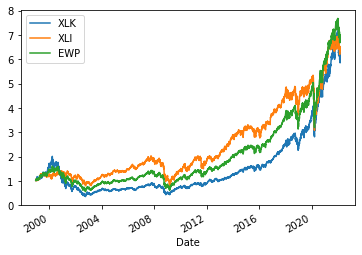

In [5]:
etfs =['XLK','XLI']
# giving equal weights
Weights=np.array([0.5,0.5])
combine_returns = returns[etfs]
combine_returns['EWP'] = combine_returns[etfs].dot(Weights)
#plot performance of individual and combined
combine_plot = ( 1+ combine_returns).cumprod()
combine_plot.plot()

In [6]:
# 2.2 Compute the standard deviation of each of the securities

In [7]:
combine_returns.std()

XLK    0.016375
XLI    0.013644
EWP    0.013962
dtype: float64

In [8]:
#2.3 Compute the correlation between the securities

In [9]:
combine_returns.corr()


,XLK,XLI,EWP
XLK,1.000000,0.728304,0.942282
XLI,0.728304,1.000000,0.915705
EWP,0.942282,0.915705,1.000000


In [10]:
#2.4 Write a function that computes the weighted return of a portfolio.

In [11]:
def weighted_returns(item_returns, weights):
  return item_returns.dot(weights).mean()

In [12]:
#2.5 Write a function that computes the portfolio standard deviation.

In [13]:
def standard_deviation(item_returns, weights, correlation='actual'):
  covariance_matrix  = item_returns.cov()
  if correlation != 'actual':
    # calculated covariance from correlation
    ex_covar = correlation * item_returns.std().prod()
    covariance_matrix.iloc[1,0] = covariance_matrix.iloc[0,1] = ex_covar
  return np.sqrt(weights.dot(covariance_matrix).dot(weights))

In [14]:
# 3.1 Write a function showing the efficient frontier (EF) of your portfolio. Be sure to vary the weights of the security from (0, 100%), (1%, 99%), … (100%,0%).

In [15]:
weighted_returns(combine_returns[etfs],Weights), standard_deviation(combine_returns[etfs],Weights)

(0.000425742107655545, 0.013962092667750335)

In [16]:
import matplotlib.pyplot as plt
def EF(returns, corr='actual'):
  efs_data=pd.DataFrame()
  for ranges in np.arange(0,1.01,0.02):
    weighted=np.array([ranges,1-ranges])
    efs_data.loc[ranges,'Return']= weighted_returns(returns,weighted)*252
    efs_data.loc[ranges,'StDev'] = standard_deviation(returns,weighted, corr)*np.sqrt(252)
  plt.plot(efs_data.StDev,efs_data.Return, label = 'correlation =' + (str(np.round(returns.corr().iloc[0,1],3))) + "(Actual)" if corr == 'actual' else str(corr))
  plt.title('EF')
  plt.xlabel('STD')
  plt.ylabel('Returns')
  plt.legend()

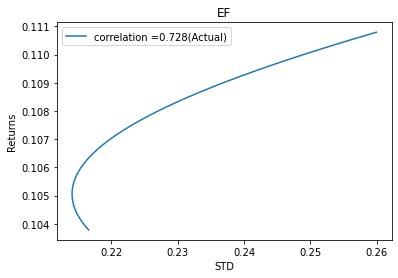

In [17]:
# returns of 2 ETFs
both=combine_returns[etfs]
EF(both)

In [18]:
#3.2 What is the leftmost point of the EF called?

Answer: Minimum Variance Portfolio

In [19]:
# 3.3 Rerun your function, but pretend the correlation between the securities is -1. Graph the EF. Comment on the shape

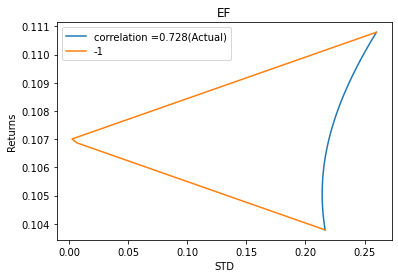

In [20]:
EF(both)
EF(both, corr= -1)

The slight Straight line show the EF with the perfect correlation

In [22]:
# 3.4 Return your function, but pretend the correlation between the securities is 0. Graph the EF. Comment on the shape.

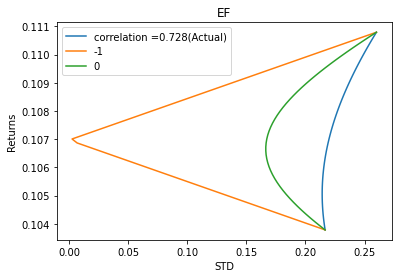

In [23]:
EF(both)
EF(both, corr= -1)
EF(both, corr= 0)

The zero-correlation EF is located between the actual-correlation 0.728 EF and the perfectly negative correlation EF.

In [24]:
# 3.5 Return your function, but pretend the correlation between the securities is 1. Graph the EF. Comment on the shape.

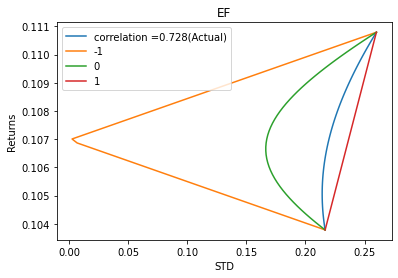

In [25]:
EF(both)
EF(both, corr= -1)
EF(both, corr= 0)
EF(both, corr= 1)

The negative correlation EF is connected by a perfect correlation of EF.


In [26]:
# 3.6 Apply 5% trim to the data. Recompute the correlation. Return the EF.

trimmed correlation: 0.5148516566801072


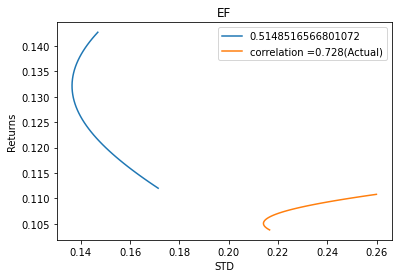

In [27]:
#%5 and 95% - triming
quartile_5, quartile_95 = np.quantile(combine_returns.EWP.dropna(),[0.05,0.95], axis=0)
trimmed_returns = combine_returns[((combine_returns.EWP>quartile_5) & (combine_returns.EWP<quartile_95))]
trimmed_returns = trimmed_returns[etfs]
correlation_trimmed = trimmed_returns.corr().iloc[0,1]# trimmed correlation

print('trimmed correlation:',correlation_trimmed)
EF(trimmed_returns,correlation_trimmed)
EF(both)

In [28]:
# 3.7 How does the EF from the actual data compare to the EF from the trimmed data?

Answer: The correlation of the actual is much better than the correlation of the trimmed.

In [30]:
#3.8 Use a robust method of portfolio (see FRAPO R Library or pyportfolioopt Python module, for example).
#3.10 How does this EF compare with the other 2

In [31]:
%%capture
!pip install PyPortfolioOpt

from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import sample_cov, CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
import pypfopt as pf
from pypfopt import plotting

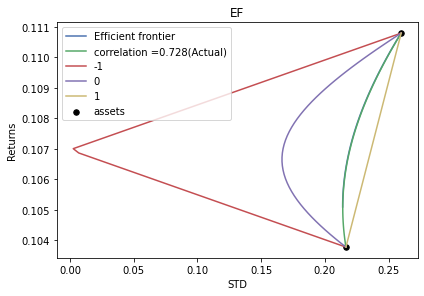

In [32]:
#mean returns (annual)
etf_prices=etfsPrices[etfs] # taking same common etfs used before
mean_value = mean_historical_return(etf_prices,compounding=False)
# covar matrix (shrink)
Shrink = CovarianceShrinkage(etf_prices).ledoit_wolf()
EF_shrink = EfficientFrontier(mean_value,Shrink)
# covariance shrinkage EF
plotting.plot_efficient_frontier(EF_shrink)
EF(both)
EF(both, corr= -1)
EF(both, corr= 0)
EF(both, corr= 1)

The addition of robust estimation of covariance matrix hasn't resulted in a significant change in the output.

In [34]:
# 4.1 Add 1 ETF to your portfolio. Calculate the correlation matrix for 3 ETFs chosen.

In [35]:
three_etfs =['XLK','XLI','XLY']
W3=np.array([1/3]*3) #equal weights
rets3 = returns[three_etfs].copy()
rets3.corr()

,XLK,XLI,XLY
XLK,1.000000,0.728304,0.724750
XLI,0.728304,1.000000,0.810757
XLY,0.724750,0.810757,1.000000


In [36]:
triple=rets3[three_etfs]

In [37]:
# 4.2 Graph the efficeint frontier of this 3-security portfolio.

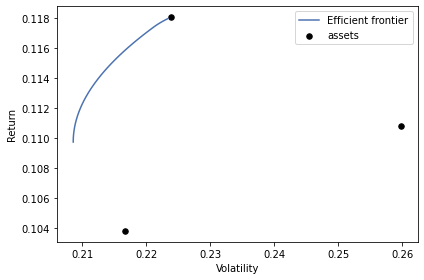

In [38]:
etf_prices=etfsPrices[three_etfs] # taking same common etfs used before
mean_value = mean_historical_return(etf_prices,compounding=False)
# covar matrix (shrink)
Shrink = CovarianceShrinkage(etf_prices).ledoit_wolf()
EF_shrink = EfficientFrontier(mean_value,Shrink)
# covariance shrinkage EF
plotting.plot_efficient_frontier(EF_shrink)

In [ ]:
# 4.3 Is there a diversification benefits to adding Security? 

Yes, there is a diversification benefits.


In [ ]:
from itertools import combinations
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from pypfopt.expected_returns import mean_historical_return
from pypfopt import efficient_frontier
from pypfopt.risk_models import sample_cov, CovarianceShrinkage
#from pypfopt import hierarchical_portfolio
from pypfopt import cla

## Part 5: Category 3 Portfolios:  All Combinations

### 5.1 Use 2019 daily return data. Apply a robust method of calculating the efficient frontier for all 165 (11 choose 3) combinations of 3 Select SPDR portfolios.  DO NOT GRAPH THESE!  You are allowed to be short securities. Call these the trained portfolios.

### 5.2 Assume a fixed amount of risk.  Use each portfolio's EF to determine the weights of each of the 3 securities.

#### Critical Line Algorithm (Robust Approach) to Derive Efficient Frontier and Determine Weights for the Trained Portfolios

Daily adjusted closing price data for 2019 is imported for the following ETFs covering 11 US sectors, based on which dialy log returns are calculated. 
- IYR: iShares U.S. Real Estate ETF
- IYZ: iShares U.S. Telecommunications ETF
- XLB: Materials Select Sector SPDR Fund
- XLE: Energy Select Sector SPDR Fund
- XLF: Financial Select Sector SPDR Fund
- XLI: Industrial Select Sector SPDR Fund
- XLK: Technology Select Sector SPDR Fund
- XLP: Consumer Staples Select Sector SPDR Fund
- XLU: Utilities Select Sector SPDR Fund
- XLV: Health Care Select Sector SPDR Fund
- XLY: Consumer Discretionary Select Sector SPDR Fund

The above ETFs were also used in Submission 1, for categorisation into the LEI, CEI and LAG buckets.

In [ ]:
# Using same list but taking data only of 2019
# etfs_lst = ['IYR', 'IYZ', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
etfsPrices = yf.download(etfs_lst, '2019-01-01', '2019-12-31')['Adj Close']

etfsPrices 

[*********************100%***********************]  11 of 11 completed


,IYR,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,
2018-12-31,68.897202,24.365145,47.550880,48.127518,22.355579,61.041004,59.955620,46.886501,48.045769,81.912819,96.020424
2019-01-02,67.407822,24.550077,47.795593,49.075790,22.543285,61.353729,59.994316,46.609501,47.219585,80.672440,96.747772
2019-01-03,67.839920,24.170963,46.440228,48.589066,22.036482,59.486778,56.966541,46.341740,47.210506,79.034378,94.652992
2019-01-04,68.566231,24.910702,48.266212,50.242264,22.768530,61.742290,59.491302,47.329704,47.909584,81.392036,97.785454
2019-01-07,69.255753,25.262077,48.435623,50.989147,22.796686,62.244560,60.023335,47.265064,47.582745,81.704506,99.996613
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,86.811554,28.316479,58.668907,53.912750,29.318375,79.413490,89.396164,59.607018,59.914783,99.230057,122.139992
2019-12-24,87.048798,28.231245,58.736168,53.886658,29.385418,79.094322,89.425568,59.682911,59.999058,99.104950,122.415215
2019-12-26,87.513794,28.297535,58.995647,53.869259,29.548243,79.278076,90.092041,59.739830,60.102055,99.037598,123.909271


In [ ]:
etfsDailyLogRet = np.log(etfsPrices/etfsPrices.shift(1))[1:]
etfsDailyLogRet

,IYR,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,
2019-01-02,-0.021855,0.007561,0.005133,0.019512,0.008361,0.005110,0.000645,-0.005925,-0.017345,-0.015258,0.007546
2019-01-03,0.006390,-0.015563,-0.028767,-0.009967,-0.022738,-0.030902,-0.051786,-0.005761,-0.000192,-0.020514,-0.021890
2019-01-04,0.010649,0.030145,0.038566,0.033458,0.032680,0.037215,0.043366,0.021095,0.014699,0.029395,0.032558
2019-01-07,0.010006,0.014007,0.003504,0.014756,0.001236,0.008102,0.008903,-0.001367,-0.006845,0.003832,0.022360
2019-01-08,0.018023,0.015256,0.010439,0.007706,0.000823,0.013610,0.008345,0.009140,0.012326,0.007735,0.010996
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,-0.005668,-0.000334,0.002789,0.010215,-0.002284,0.008193,0.002855,-0.004288,-0.009333,0.003984,-0.002331
2019-12-24,0.002729,-0.003015,0.001146,-0.000484,0.002284,-0.004027,0.000329,0.001272,0.001406,-0.001262,0.002251
2019-12-26,0.005328,0.002345,0.004408,-0.000323,0.005526,0.002321,0.007425,0.000953,0.001715,-0.000680,0.012131


The annualised mean historical returns calculated below from the above daily log returns over 2019 are used as estimates of expected returns for the 11 ETFs.

In [ ]:
etfsExpLogRet = mean_historical_return(etfsPrices, returns_data=False, compounding=True, frequency=251, log_returns=True)
etfsExpLogRet

IYR    0.265703
IYZ    0.148032
XLB    0.217147
XLE    0.091279
XLF    0.298573
XLI    0.275924
XLK    0.469152
XLP    0.265699
XLU    0.246239
XLV    0.191414
XLY    0.269329
dtype: float64

We now use these expected returns and the covariance matrix to trace out the efficient frontiers for all possible 3-ETF portfolios which can be constructed from our 11 ETFs. There are 165 such portfolios (11C3) and, therefore, 165 efficient frontiers.

The Critical Line Algorithm (CLA) has been used to estimate these frontiers. CLA was developed by Harry Markowitz to optimise general quadratic functions subject to linear inequality constraints. CLA solves any portfolio optimisation problem that can be represented in such terms, like the standard Efficient Frontier problem. The posterior mean and posterior covariance derived by Black-Litterman also lead to a quadratic programming problem, thus CLA is also a useful tool in that Bayesian framework. However, portfolio optimisation problems which cannot be represented in a quadratic form cannot be solved by CLA.

As required in the assignment, we assume volatility to be 0.08% and find the expected return and ETF weights for the portfolio lying on each of the 165 efficient frontiers. Since the efficient frontier is given as a set of discrete points instead of an equation, we use the expected return and weights available for the volatility level nearest to our assumed volatility level.

The expected returns and weights thus obtained are stored in a dataframe.

In [ ]:
# Function to find the value in an array which is nearest to a pre-specified value
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return (idx, array[idx])

In [ ]:
lst3etfComb = list(combinations(etfsPrices.columns,3))
constVol = 0.008
matrix3etf_constVol = np.zeros((165, 4))

for i in lst3etfComb:
    ret3etf = [etfsExpLogRet[i[0]], etfsExpLogRet[i[1]], etfsExpLogRet[i[2]]]
    cov3etfRobust = CovarianceShrinkage(pd.DataFrame([etfsPrices[i[0]], etfsPrices[i[1]], etfsPrices[i[2]]]).transpose()).ledoit_wolf()
    
    claClass = cla.CLA(ret3etf, cov3etfRobust, weight_bounds = (-1,1))
    efRet, efStdev, efWeights = claClass.efficient_frontier(points = 100)
    
    idx, val = find_nearest(efStdev, constVol)
    efWeights_constVol = efWeights[idx]
    efRet_constVol = efRet[idx]
#    print(efRet_constVol1, np.around(efWeights_constVol1, 2))
    

    matrix3etf_constVol[lst3etfComb.index(i), 0] = efRet_constVol
    matrix3etf_constVol[lst3etfComb.index(i), 1] = efWeights_constVol[0]
    matrix3etf_constVol[lst3etfComb.index(i), 2] = efWeights_constVol[1]
    matrix3etf_constVol[lst3etfComb.index(i), 3] = efWeights_constVol[2]
    
#    print(np.around(np.mean(np.array(efStdev)), 3))
#    plt.plot(efStdev, efRet)

In [ ]:
df3etf_constVol = pd.DataFrame(matrix3etf_constVol, columns = ['ExpRet2019', 'OptWt_ETF1', 'OptWt_ETF2', 'OptWt_ETF3'])
df3etf_constVol.insert(0, 'Portfolio' , lst3etfComb)

#with pd.option_context("display.max_rows", 2000, "display.max_columns", 100):
#    display(df3etf_constVol)
#np.std(df3etf_constVol['OptWt_ETF3'])

### 5.3 Rank the 2019 portfolio returns.

In [ ]:
rank = df3etf_constVol['ExpRet2019'].rank(ascending = False)
df3etf_constVol.insert(1, 'Rank2019' , rank)
df3etf_constVol.sort_values(by = 'ExpRet2019', ascending = False)

,Portfolio,Rank2019,ExpRet2019,OptWt_ETF1,OptWt_ETF2,OptWt_ETF3
130,"(XLF, XLI, XLK)",1.0,0.306276,0.475042,0.423560,0.101398
110,"(XLE, XLF, XLK)",2.0,0.294911,0.192753,0.594477,0.212770
36,"(IYR, XLK, XLU)",3.0,0.294021,0.329162,0.185613,0.485225
155,"(XLK, XLP, XLU)",4.0,0.282193,0.124468,0.421797,0.453735
89,"(XLB, XLF, XLK)",5.0,0.281622,0.433206,0.459378,0.107416
...,...,...,...,...,...,...
58,"(IYZ, XLE, XLV)",161.0,0.164762,0.399738,0.092979,0.507284
45,"(IYZ, XLB, XLE)",162.0,0.162865,0.605733,0.295621,0.098646
55,"(IYZ, XLE, XLK)",163.0,0.159649,0.752187,0.179850,0.067962
74,"(IYZ, XLK, XLY)",164.0,0.154201,0.575559,-0.226774,0.651215


### 5.4 Test each of the 165 portfolios using 2020 daily return data.

After importing the 2020 Adjusted Close prices for the ETFs and calculating daily log returns based on these, we apply the weights calculated above to estimate the 2020 expected return for all 165 3-ETF portfolio combinations as a weighted average of the individual ETFs' 2020 expected returns.

In [ ]:
etfsPrices2020 = yf.download(etfs_lst, '2020-01-01', '2020-12-31')['Adj Close']
#etfsPrices2020

[*********************100%***********************]  11 of 11 completed


In [ ]:
etfsExpLogRet2020 = mean_historical_return(etfsPrices2020, returns_data=False, compounding=True, frequency=252, log_returns=True)
#etfsExpLogRet2020

In [ ]:
expRet2020 = np.zeros((165, 3))
for (i, j) in zip(df3etf_constVol['Portfolio'], df3etf_constVol.index):
    expRet2020[j, 0] = etfsExpLogRet2020[i[0]]
    expRet2020[j, 1] = etfsExpLogRet2020[i[1]]
    expRet2020[j, 2] = etfsExpLogRet2020[i[2]]

optWtMatrix = np.array([df3etf_constVol['OptWt_ETF1'], df3etf_constVol['OptWt_ETF2'], df3etf_constVol['OptWt_ETF3']]).transpose()

df3etf_constVol.insert(3, 'ExpRet2020' , np.sum(expRet2020 * optWtMatrix, axis = 1))

### 5.5 Rank the 2020 portfolio returns.

In [ ]:
rank2020 = df3etf_constVol['ExpRet2020'].rank(ascending = False)
df3etf_constVol.insert(2, 'Rank2020', rank2020)
df3etf_constVol.sort_values(by = 'ExpRet2020', ascending = False)

,Portfolio,Rank2019,Rank2020,ExpRet2019,ExpRet2020,OptWt_ETF1,OptWt_ETF2,OptWt_ETF3
98,"(XLB, XLI, XLY)",50.0,1.0,0.255016,0.172522,0.285259,0.086804,0.627937
102,"(XLB, XLK, XLY)",131.0,2.0,0.213603,0.162095,0.378352,-0.180073,0.801721
148,"(XLI, XLK, XLY)",101.0,3.0,0.232187,0.128235,0.361443,-0.197805,0.836362
108,"(XLB, XLV, XLY)",120.0,4.0,0.221239,0.126587,0.158401,0.511123,0.330476
93,"(XLB, XLF, XLY)",30.0,5.0,0.262507,0.123519,0.245176,0.204222,0.550602
...,...,...,...,...,...,...,...,...
25,"(IYR, XLF, XLK)",12.0,161.0,0.272398,-0.148900,0.661769,0.364162,-0.025930
18,"(IYR, XLE, XLI)",87.0,162.0,0.237662,-0.167614,0.669219,0.170176,0.160605
17,"(IYR, XLE, XLF)",57.0,163.0,0.251797,-0.175944,0.640745,0.124050,0.235206
21,"(IYR, XLE, XLU)",124.0,164.0,0.216959,-0.181511,0.306442,0.227443,0.466115


Text(0, 0.5, 'Rank based on 2020 Expected Return')

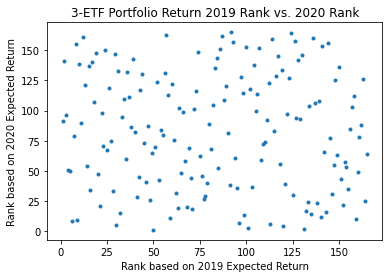

In [ ]:
plt.plot(df3etf_constVol['Rank2019'], df3etf_constVol['Rank2020'], '.')
plt.title('3-ETF Portfolio Return 2019 Rank vs. 2020 Rank')
plt.xlabel('Rank based on 2019 Expected Return')
plt.ylabel('Rank based on 2020 Expected Return')

Text(0, 0.5, '2020 Expected Return')

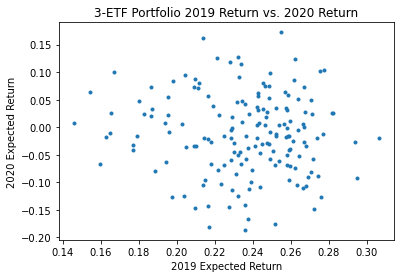

In [ ]:
plt.plot(df3etf_constVol['ExpRet2019'], df3etf_constVol['ExpRet2020'], '.')
plt.title('3-ETF Portfolio 2019 Return vs. 2020 Return')
plt.xlabel('2019 Expected Return')
plt.ylabel('2020 Expected Return')

The above two plots show that the expected return/ rank for 2019 is not a good predictor of the expected return/ rank for 2020 respectively.

## Part 6: Analysing 3-Security Portfolio

### 6.1 Relabel the ETF with a + sign if the weight >0, or a - sign if the weight <0.  Then add the assigned Economic Indicator.

The below dataframe summarises how 3 supervised learning models used in submission 1 place each of the 11 ETFs into the 3 economic indicator buckets (LEI, CEI, LAG). The final category used for each ETF is LEI unless at least one of the models places it into a bucket other than LEI, in which case the other bucket is taken to be the final category.

In [ ]:
etfsCategories = pd.read_excel('ETF Categories_GWP 1.xlsx')
etfsCategories

,ETF,Linear Model,Lasso Model,Regression Tree
0,IYR,LEI,LEI,LEI
1,IYZ,LEI,CEI,LEI
2,XLB,LEI,LEI,LEI
3,XLE,LEI,LEI,LEI
4,XLF,LEI,LEI,LEI
5,XLI,LEI,CEI,LEI
6,XLK,LEI,LEI,LAG
7,XLP,LEI,LEI,LEI
8,XLU,LEI,LEI,LAG
9,XLV,LEI,LEI,LEI


In [ ]:
etfsCategories['FinalCat'] = ['LEI', 'CEI', 'LEI', 'LEI', 'LEI', 'CEI', 'LEI', 'LEI', 'LAG', 'LEI', 'LAG']
etfsCategories.set_index('ETF', drop = True, inplace = True)
etfsCategories

,Linear Model,Lasso Model,Regression Tree,FinalCat
ETF,,,,
IYR,LEI,LEI,LEI,LEI
IYZ,LEI,CEI,LEI,CEI
XLB,LEI,LEI,LEI,LEI
XLE,LEI,LEI,LEI,LEI
XLF,LEI,LEI,LEI,LEI
XLI,LEI,CEI,LEI,CEI
XLK,LEI,LEI,LAG,LEI
XLP,LEI,LEI,LEI,LEI
XLU,LEI,LEI,LAG,LAG


In [ ]:
indicCat = list()

for (i, j) in zip(df3etf_constVol['Portfolio'], df3etf_constVol.index):
    catEtf1 = etfsCategories['FinalCat'].loc[i[0]]
    catEtf2 = etfsCategories['FinalCat'].loc[i[1]]
    catEtf3 = etfsCategories['FinalCat'].loc[i[2]]
    
    if (df3etf_constVol['OptWt_ETF1'][j] >= 0): wtSignEtf1 = '+'
    else: wtSignEtf1 = '-'
    
    if (df3etf_constVol['OptWt_ETF2'][j] >= 0): wtSignEtf2 = '+'
    else: wtSignEtf2 = '-'
    
    if (df3etf_constVol['OptWt_ETF3'][j] >= 0): wtSignEtf3 = '+'
    else: wtSignEtf3 = '-'
        
    
    indicCat.append((wtSignEtf1 + catEtf1, wtSignEtf2 + catEtf2, wtSignEtf3 + catEtf3))

df3etf_constVol['IndicCat'] = indicCat
df3etf_constVol

,Portfolio,Rank2019,Rank2020,ExpRet2019,ExpRet2020,OptWt_ETF1,OptWt_ETF2,OptWt_ETF3,IndicCat
0,"(IYR, IYZ, XLB)",116.0,129.0,0.224842,-0.068567,0.568625,0.288147,0.143228,"(+LEI, +CEI, +LEI)"
1,"(IYR, IYZ, XLE)",136.0,160.0,0.209593,-0.146667,0.588091,0.277276,0.134633,"(+LEI, +CEI, +LEI)"
2,"(IYR, IYZ, XLF)",74.0,149.0,0.243802,-0.108299,0.567700,0.239874,0.192425,"(+LEI, +CEI, +LEI)"
3,"(IYR, IYZ, XLI)",104.0,138.0,0.231380,-0.084194,0.579470,0.301981,0.118550,"(+LEI, +CEI, +CEI)"
4,"(IYR, IYZ, XLK)",128.0,142.0,0.215078,-0.095956,0.606881,0.406718,-0.013599,"(+LEI, +CEI, -LEI)"
...,...,...,...,...,...,...,...,...,...
160,"(XLK, XLV, XLY)",159.0,10.0,0.167103,0.100271,-0.269261,0.621462,0.647800,"(-LEI, +LEI, +LAG)"
161,"(XLP, XLU, XLV)",81.0,68.0,0.242101,0.004397,0.396469,0.387339,0.216192,"(+LEI, +LAG, +LEI)"
162,"(XLP, XLU, XLY)",46.0,41.0,0.257734,0.035378,0.280164,0.458100,0.261736,"(+LEI, +LAG, +LAG)"
163,"(XLP, XLV, XLY)",63.0,19.0,0.248777,0.075594,0.650144,0.233482,0.116374,"(+LEI, +LEI, +LAG)"


### 6.2 Using the ranks from 5.5, determine which combinations tend to be the best performing. Interpret the results.

In [ ]:
indicComb = df3etf_constVol[['IndicCat', 'ExpRet2019', 'ExpRet2020']].groupby('IndicCat').mean()

indicRank2019 = indicComb['ExpRet2019'].rank(ascending = False)
indicRank2020 = indicComb['ExpRet2020'].rank(ascending = False)

indicComb.insert(2, 'Rank2019', indicRank2019)
indicComb.insert(3, 'Rank2020', indicRank2020)

In [ ]:
indicComb.sort_values(by = 'ExpRet2019', ascending = False)

,ExpRet2019,ExpRet2020,Rank2019,Rank2020
IndicCat,,,,
"(+LEI, +LEI, -LEI)",0.272398,-0.148900,1.0,27.0
"(+LEI, +LEI, +CEI)",0.252537,-0.082502,2.0,24.0
"(+LEI, +LAG, +LAG)",0.250635,-0.004740,3.0,14.0
"(+LEI, +CEI, +LAG)",0.250314,-0.007568,4.0,15.0
"(+LEI, +LEI, +LAG)",0.249670,-0.014912,5.0,16.0
"(+LEI, +CEI, +LEI)",0.246995,-0.022708,6.0,20.0
"(+CEI, +LAG, +LAG)",0.245484,0.007534,7.0,11.0
"(+LAG, +LEI, +LAG)",0.245400,0.032243,8.0,6.0
"(+LEI, +LEI, +LEI)",0.244059,-0.039910,9.0,22.0


In [ ]:
indicComb.sort_values(by = 'ExpRet2020', ascending = False)

,ExpRet2019,ExpRet2020,Rank2019,Rank2020
IndicCat,,,,
"(+CEI, -LEI, +LAG)",0.193194,0.096339,24.0,1.0
"(-LEI, +LEI, +LAG)",0.206224,0.090436,21.0,2.0
"(+LEI, -LEI, +LAG)",0.230411,0.073377,14.0,3.0
"(-LEI, +LEI, +LEI)",0.234241,0.047888,12.0,4.0
"(+CEI, +CEI, +LEI)",0.214749,0.034164,20.0,5.0
"(+LAG, +LEI, +LAG)",0.245400,0.032243,8.0,6.0
"(-LEI, +LAG, +LAG)",0.242951,0.030356,10.0,7.0
"(+CEI, -LEI, +LEI)",0.205508,0.020727,22.0,8.0
"(+CEI, +CEI, +LAG)",0.221416,0.020621,18.0,9.0


After specifying the indicator (LEI, CEI, LAG) and positional (long + / short -) categories for each ETF in each portfolio, the above two dataframes identify the unique indicator combinations resulting from these portfolios and rank the 2019 and 2020 returns for these combinations. However, this does not reveal much about which indicators tend to perform better.

So, we calculate the weights which each portfolio attributes to LEI, CEI and LAG. This is done by looking at the indicator bucket for each asset in the portfolio, and assigning the weight for that asset to its indicator bucket.

If more than one asset in the portfolio are assigned to the same indicator bucket, the weights for those two assets are summed and the result is assigned to the indicator bucket. If no asset is assigned to an indicator bucket, the weight of that bucket in the portfolio is taken to be 0.

In [ ]:
indicComb2 = pd.DataFrame(index = df3etf_constVol.index, columns = ['OptWt_LEI', 'OptWt_CEI', 'OptWt_LAG'])

for (i, j) in zip(df3etf_constVol['IndicCat'], df3etf_constVol['IndicCat'].index):
    indicComb2['OptWt_LEI'].loc[j] = ((df3etf_constVol['OptWt_ETF1'].loc[j] * (i[0][-3:] == 'LEI')) +
                                      (df3etf_constVol['OptWt_ETF2'].loc[j] * (i[1][-3:] == 'LEI')) +
                                      (df3etf_constVol['OptWt_ETF3'].loc[j] * (i[2][-3:] == 'LEI')))
    
    indicComb2['OptWt_CEI'].loc[j] = ((df3etf_constVol['OptWt_ETF1'].loc[j] * (i[0][-3:] == 'CEI')) +
                                      (df3etf_constVol['OptWt_ETF2'].loc[j] * (i[1][-3:] == 'CEI')) +
                                      (df3etf_constVol['OptWt_ETF3'].loc[j] * (i[2][-3:] == 'CEI')))
    
    indicComb2['OptWt_LAG'].loc[j] = ((df3etf_constVol['OptWt_ETF1'].loc[j] * (i[0][-3:] == 'LAG')) +
                                      (df3etf_constVol['OptWt_ETF2'].loc[j] * (i[1][-3:] == 'LAG')) +
                                      (df3etf_constVol['OptWt_ETF3'].loc[j] * (i[2][-3:] == 'LAG')))

indicComb2.insert(0, 'Portfolio', df3etf_constVol['Portfolio'])
indicComb2.insert(1, 'IndicCat', df3etf_constVol['IndicCat'])
indicComb2.insert(5, 'ExpRet2019', df3etf_constVol['ExpRet2019'])
indicComb2.insert(6, 'ExpRet2020', df3etf_constVol['ExpRet2020'])

indicComb2

,Portfolio,IndicCat,OptWt_LEI,OptWt_CEI,OptWt_LAG,ExpRet2019,ExpRet2020
0,"(IYR, IYZ, XLB)","(+LEI, +CEI, +LEI)",0.711853,0.288147,0.0,0.224842,-0.068567
1,"(IYR, IYZ, XLE)","(+LEI, +CEI, +LEI)",0.722724,0.277276,0.0,0.209593,-0.146667
2,"(IYR, IYZ, XLF)","(+LEI, +CEI, +LEI)",0.760126,0.239874,0.0,0.243802,-0.108299
3,"(IYR, IYZ, XLI)","(+LEI, +CEI, +CEI)",0.57947,0.42053,0.0,0.231380,-0.084194
4,"(IYR, IYZ, XLK)","(+LEI, +CEI, -LEI)",0.593282,0.406718,0.0,0.215078,-0.095956
...,...,...,...,...,...,...,...
160,"(XLK, XLV, XLY)","(-LEI, +LEI, +LAG)",0.3522,0.0,0.6478,0.167103,0.100271
161,"(XLP, XLU, XLV)","(+LEI, +LAG, +LEI)",0.612661,0.0,0.387339,0.242101,0.004397
162,"(XLP, XLU, XLY)","(+LEI, +LAG, +LAG)",0.280164,0.0,0.719836,0.257734,0.035378
163,"(XLP, XLV, XLY)","(+LEI, +LEI, +LAG)",0.883626,0.0,0.116374,0.248777,0.075594


We now visualise how the 2019 and 2020 expected returns evolve as the weight allocated to a certain indicator bucket increases.

Text(0, 0.5, 'Portfolio Expected Return')

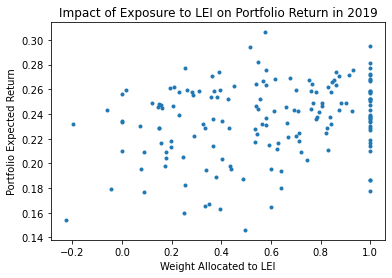

In [ ]:
dataPlotLeiRet19 = indicComb2[['OptWt_LEI', 'ExpRet2019']].sort_values(by = 'OptWt_LEI', ascending = True)
plt.plot(dataPlotLeiRet19['OptWt_LEI'], dataPlotLeiRet19['ExpRet2019'], '.')
plt.title('Impact of Exposure to LEI on Portfolio Return in 2019')
plt.xlabel('Weight Allocated to LEI')
plt.ylabel('Portfolio Expected Return')

Text(0, 0.5, 'Portfolio Expected Return')

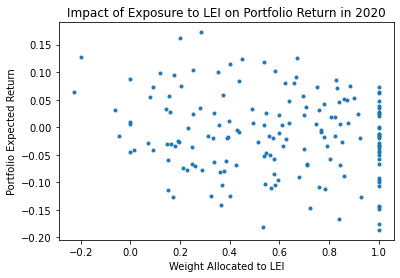

In [ ]:
dataPlotLeiRet20 = indicComb2[['OptWt_LEI', 'ExpRet2020']].sort_values(by = 'OptWt_LEI', ascending = True)
plt.plot(dataPlotLeiRet20['OptWt_LEI'], dataPlotLeiRet20['ExpRet2020'], '.')
plt.title('Impact of Exposure to LEI on Portfolio Return in 2020')
plt.xlabel('Weight Allocated to LEI')
plt.ylabel('Portfolio Expected Return')

Increasing a portfolio's exposure to LEI tended to increase returns over 2019 and decrease returns over 2020.

Text(0, 0.5, 'Portfolio Expected Return')

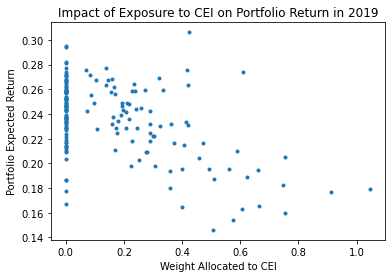

In [ ]:
dataPlotCeiRet19 = indicComb2[['OptWt_CEI', 'ExpRet2019']].sort_values(by = 'OptWt_CEI', ascending = True)
plt.plot(dataPlotCeiRet19['OptWt_CEI'], dataPlotCeiRet19['ExpRet2019'], '.')
plt.title('Impact of Exposure to CEI on Portfolio Return in 2019')
plt.xlabel('Weight Allocated to CEI')
plt.ylabel('Portfolio Expected Return')

Text(0, 0.5, 'Portfolio Expected Return')

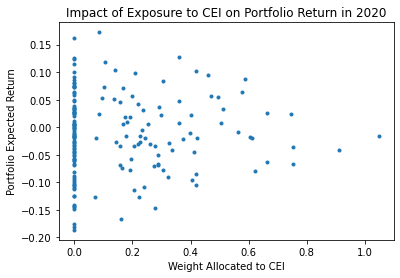

In [ ]:
dataPlotCeiRet20 = indicComb2[['OptWt_CEI', 'ExpRet2020']].sort_values(by = 'OptWt_CEI', ascending = True)
plt.plot(dataPlotCeiRet20['OptWt_CEI'], dataPlotCeiRet20['ExpRet2020'], '.')
plt.title('Impact of Exposure to CEI on Portfolio Return in 2020')
plt.xlabel('Weight Allocated to CEI')
plt.ylabel('Portfolio Expected Return')

Increasing a portfolio's exposure to CEI tended to decrease returns over 2019. However, the effect of CEI on 2020 returns appears to be ambiguous upon visual inspection.

Text(0, 0.5, 'Portfolio Expected Return')

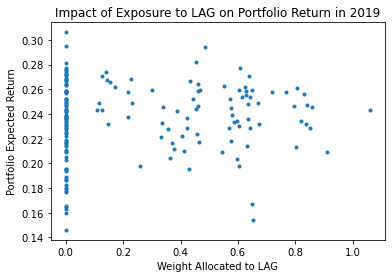

In [ ]:
dataPlotLagRet19 = indicComb2[['OptWt_LAG', 'ExpRet2019']].sort_values(by = 'OptWt_LAG', ascending = True)
plt.plot(dataPlotLagRet19['OptWt_LAG'], dataPlotLagRet19['ExpRet2019'], '.')
plt.title('Impact of Exposure to LAG on Portfolio Return in 2019')
plt.xlabel('Weight Allocated to LAG')
plt.ylabel('Portfolio Expected Return')

Text(0, 0.5, 'Portfolio Expected Return')

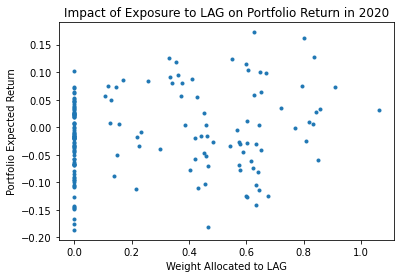

In [ ]:
dataPlotLagRet20 = indicComb2[['OptWt_LAG', 'ExpRet2020']].sort_values(by = 'OptWt_LAG', ascending = True)
plt.plot(dataPlotLagRet20['OptWt_LAG'], dataPlotLagRet20['ExpRet2020'], '.')
plt.title('Impact of Exposure to LAG on Portfolio Return in 2020')
plt.xlabel('Weight Allocated to LAG')
plt.ylabel('Portfolio Expected Return')

Increasing a portfolio's exposure to LAG appears to have a marginal negative impact on 2019 returns and a relatively stronger positive impact on 2020 returns.

## Part 7: Category 4 Portfolios: Using Principal Components

### 7.1 Compute the PCA from the correlation matrix of the 11 ETFs.

We use daily returns instead of log returns for this analysis since the mean_historical_return function does not take log returns as an input.

In [ ]:
etfsDailyRet2019 = (etfsPrices/etfsPrices.shift(1)-1)[1:]
etfsDailyRet2019

,IYR,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,
2019-01-02,-0.021617,0.007590,0.005146,0.019703,0.008396,0.005123,0.000645,-0.005908,-0.017196,-0.015143,0.007575
2019-01-03,0.006410,-0.015442,-0.028358,-0.009918,-0.022481,-0.030429,-0.050468,-0.005745,-0.000192,-0.020305,-0.021652
2019-01-04,0.010706,0.030604,0.039319,0.034024,0.033220,0.037916,0.044320,0.021319,0.014808,0.029831,0.033094
2019-01-07,0.010056,0.014105,0.003510,0.014866,0.001237,0.008135,0.008943,-0.001366,-0.006822,0.003839,0.022612
2019-01-08,0.018186,0.015373,0.010494,0.007735,0.000823,0.013703,0.008380,0.009182,0.012402,0.007765,0.011056
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,-0.005652,-0.000334,0.002792,0.010267,-0.002282,0.008227,0.002859,-0.004279,-0.009289,0.003992,-0.002328
2019-12-24,0.002733,-0.003010,0.001146,-0.000484,0.002287,-0.004019,0.000329,0.001273,0.001407,-0.001261,0.002253
2019-12-26,0.005342,0.002348,0.004418,-0.000323,0.005541,0.002323,0.007453,0.000954,0.001717,-0.000680,0.012205


The above 11-dimensional dataset is reduced to a 3-dimensional dataset using Principal Component Analysis. Since the implementation of the PCA algorithm in sci-kit learn automatically computes the covariance matrix, we do not compute it explicitly here.

In [ ]:
pc2019 = PCA(n_components = 3).fit_transform(etfsDailyRet2019)
pc2019

array([[ 7.39487514e-03,  3.73930312e-02, -3.15738914e-03],
       [-7.37798017e-02, -1.09606662e-03,  2.58637724e-02],
       [ 1.00732384e-01, -7.47533407e-03, -8.75236934e-04],
       [ 2.39973999e-02,  4.88630796e-03,  1.92190695e-03],
       [ 2.69321254e-02, -1.62352002e-02,  6.93070577e-03],
       [ 1.15083823e-02,  1.57430450e-02,  2.41373549e-03],
       [ 1.29143614e-02, -1.25876437e-02,  6.21543579e-03],
       [-2.87755888e-03, -3.73602219e-03, -3.14005776e-03],
       [-1.78641720e-02,  2.04294799e-02, -6.71668977e-03],
       [ 1.70973895e-02, -1.77516727e-02,  6.22555385e-03],
       [ 3.41986621e-03,  1.52698154e-03, -2.05389829e-03],
       [ 2.34473320e-02, -4.28190344e-04,  8.36236996e-04],
       [ 4.34729577e-02,  3.75706307e-03,  2.81007187e-03],
       [-4.66070666e-02, -5.53398458e-03, -1.88548247e-03],
       [-8.94706409e-04, -1.47061385e-02, -3.28740436e-03],
       [ 1.21039150e-03,  5.46280918e-03,  1.40456501e-03],
       [ 2.66673058e-02,  1.15274424e-02

### 7.2 Using 2019 data, compute the EF for the first 3 principal components portfolio.

The above 3 PCs are used to estimate 2019 expected return and covariances, which are then fed into the Critical Line Algorithm to obtain the efficient frontier resulting from a portfolio of the 3 PCs.

Text(0, 0.5, 'Portfolio Expected Return')

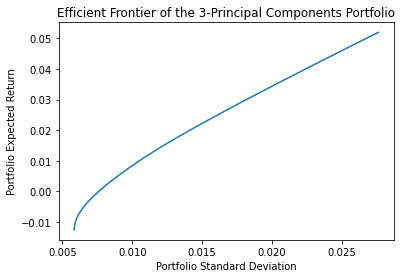

In [ ]:
pcExpRet2019 = mean_historical_return(pd.DataFrame(pc2019, columns = ['PC1', 'PC2','PC3']), returns_data = True, compounding = True, frequency = 251, log_returns = False)
pcCovMat2019 = np.cov(pc2019.transpose())

pcClaClass = cla.CLA(pcExpRet2019, pcCovMat2019, weight_bounds = (-1,1))
pcEfRet, pcEfStdev, pcEfWeights = pcClaClass.efficient_frontier(points = 100)

plt.plot(pcEfStdev, pcEfRet)
plt.title('Efficient Frontier of the 3-Principal Components Portfolio')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Expected Return')

### 7.3 How does the PCA portfolio return compare to the 2019  3-security portfolio returns?

We now use the 0.8% volatility and the approach laid out in 5.2 to get the expected return and weights for the 3-PC portfolio lying on the efficient frontier for the assumed volatility level.

In [ ]:
idx, val = find_nearest(pcEfStdev, constVol)
pcEfWeights_constVol = np.around(pcEfWeights[idx], 2)
pcEfRet_constVol = pcEfRet[idx]
print('PCA Portfolio Weights:',pcEfWeights_constVol)
print('2019 PCA Portfolio Return:', pcEfRet_constVol)
print('Average 2019 3-security Portfolio Return across all 165 Combinations:', df3etf_constVol['ExpRet2019'].mean())

PCA Portfolio Weights: [[-0.16]
 [ 0.28]
 [ 0.88]]
2019 PCA Portfolio Return: 0.001759927182599476
Average 2019 3-security Portfolio Return across all 165 Combinations: 0.2356614247139795


The PCA portfolio return of 0.176% is much lower than the average of the 2019 returns across 165 portfolios, which stands at 23.566%.

### 7.4 Assuming a fixed amount of risk, and 2020 data, use the PC weights to compute the 3-PC portfolio returns.

In [ ]:
etfsDailyRet2020 = (etfsPrices2020/etfsPrices2020.shift(1)-1)[1:]
etfsDailyRet2020

,IYR,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,
2020-01-02,-0.011066,0.000669,-0.011722,0.008994,0.009746,0.018903,0.018763,-0.007939,-0.012535,0.002651,0.011880
2020-01-03,0.007170,-0.005351,-0.016145,-0.002971,-0.010618,-0.001927,-0.011243,-0.001600,0.002037,-0.008714,-0.008510
2020-01-06,0.000863,0.001345,-0.004354,0.007782,-0.000650,0.000362,0.002382,0.002084,0.000939,0.006223,0.002781
2020-01-07,-0.010130,-0.002686,-0.001177,-0.002629,-0.006508,-0.002051,-0.000432,-0.007679,-0.001406,-0.001963,-0.001585
2020-01-08,0.002395,0.004040,0.003536,-0.016472,0.006551,0.003385,0.010700,0.003708,-0.000469,0.006491,0.003016
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,-0.006769,0.004323,0.001408,0.022139,0.016526,0.005255,-0.007586,0.003325,-0.001970,0.000720,0.002163
2020-12-24,0.007892,0.000662,0.006327,-0.005219,0.001384,0.000114,0.006630,0.004971,0.007075,0.002879,0.002094
2020-12-28,0.009135,0.002316,-0.003912,-0.006296,0.004836,0.001250,0.011313,0.007944,0.004411,0.002512,0.011401


Using sci-kit learn's PCA implementation to get the 3 PCs from 2020 daily return data.

In [ ]:
pc2020 = PCA(n_components = 3).fit_transform(etfsDailyRet2020)
pcExpRet2020 = mean_historical_return(pd.DataFrame(pc2020, columns = ['PC1', 'PC2','PC3']), returns_data = True, compounding = True, frequency = 252, log_returns = False)
pcExpRet2020

PC1   -0.507019
PC2   -0.067412
PC3   -0.026557
dtype: float64

The historical estimates of expected returns given above are used with the 2019 weights calculated in 7.3 to get the expected return for the 2020 3-PC portfolio. This stands at 3.89%, higher than the expected return for the 2019 3-PC portfolio.

In [ ]:
pcPortExpRet2020 = np.sum(pcEfWeights_constVol * np.array(pcExpRet2020).reshape(3,1))
pcPortExpRet2020

0.03887729147415522